#### Author: Mustafa Radheyyan
#### Date: 04/24/2023
#### Assignment: Cognixia JUMPlus Python Project 4
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# <span style="color:#0167E3">Phase 1 (Data Cleaning Phase)</span>

## 1. Import required libraries

In [1238]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Path of data source

In [1239]:
VIDEO_GAMES_SALES_CSV_PATH = 'Video_Games_Sales_as_at_22_Dec_2016.csv'

Context Manager helper functions for displaying DataFrames differently than the default configuration settings

In [1240]:
def force_show_all_columns(df):
    with pd.option_context('display.max_columns', None, 'display.width', None):
        display(df)

In [1241]:
def use_inf_as_na(df, df_command):
    with pd.option_context('mode.use_inf_as_na', True):
        return df_command(df)

## 2. Read the csv file

There are no specific index columns in this dataset. The 'Name' column is not unique because there are the same games (with identical names) on different platforms

In [1242]:
video_game_sales_df = pd.read_csv(VIDEO_GAMES_SALES_CSV_PATH)

column_to_check = 'Name'

print(f"The number of unique {{{column_to_check.lower()}}} is: {len(video_game_sales_df[column_to_check].unique())}, compared to the number of rows total: {len(video_game_sales_df)}")

The number of unique {name} is: 11563, compared to the number of rows total: 16719


## Data Cleaning

##### Get DF Column List and Id Column (Index)

Made DataFrame's columns lower case in order to be more computing friendly<br></br>
Made a list of the dataframe's columns to enable easier searching of column names

In [1243]:
video_game_sales_df.columns = video_game_sales_df.columns.str.lower()
video_game_sales_columns = list(video_game_sales_df.columns)
video_game_sales_columns

['name',
 'platform',
 'year_of_release',
 'genre',
 'publisher',
 'na_sales',
 'eu_sales',
 'jp_sales',
 'other_sales',
 'global_sales',
 'critic_score',
 'critic_count',
 'user_score',
 'user_count',
 'developer',
 'rating']

## 3. Show first five results

The head function displays 5 rows by default

In [1244]:
video_game_sales_df.head()

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


## 4. Show if columns have any NaN,N/A or null values in boolean form

In [1245]:
force_show_all_columns(video_game_sales_df.isna().any().to_frame(name='Has NaN or N/A').transpose())

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
Has NaN or N/A,True,False,True,True,True,False,False,False,False,False,True,True,True,True,True,True


## 5. Check how many null,empty,N/A values are there in each column

In [1246]:
# video_game_sales_df.loc[0, 'name'] = ''

In [1247]:
force_show_all_columns(video_game_sales_df.isna().sum(axis=0).to_frame(name='# of null, empty, N/A').transpose())

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
"# of null, empty, N/A",2,0,269,2,54,0,0,0,0,0,8582,8582,9129,9129,6623,6769


In [1248]:
force_show_all_columns(use_inf_as_na(video_game_sales_df, pd.DataFrame.isna).sum(axis=0).to_frame(name='# of null, empty, N/A').transpose())

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
"# of null, empty, N/A",2,0,269,2,54,0,0,0,0,0,8582,8582,9129,9129,6623,6769


In [1249]:
null_video_games_df = (video_game_sales_df.isna() | video_game_sales_df.eq('')).astype('bool')
null_video_games_count_df = null_video_games_df.sum(axis=0).to_frame(name='# of null, empty, N/A').transpose()
force_show_all_columns(null_video_games_count_df)

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
"# of null, empty, N/A",2,0,269,2,54,0,0,0,0,0,8582,8582,9129,9129,6623,6769


In [1250]:
null_video_games_percent_df = null_video_games_count_df / len(video_game_sales_df)
null_video_games_percent_df

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
"# of null, empty, N/A",0.00012,0.0,0.016089,0.00012,0.00323,0.0,0.0,0.0,0.0,0.0,0.513308,0.513308,0.546025,0.546025,0.396136,0.404869


## 6. Show null values of each column with the help of Heatmap

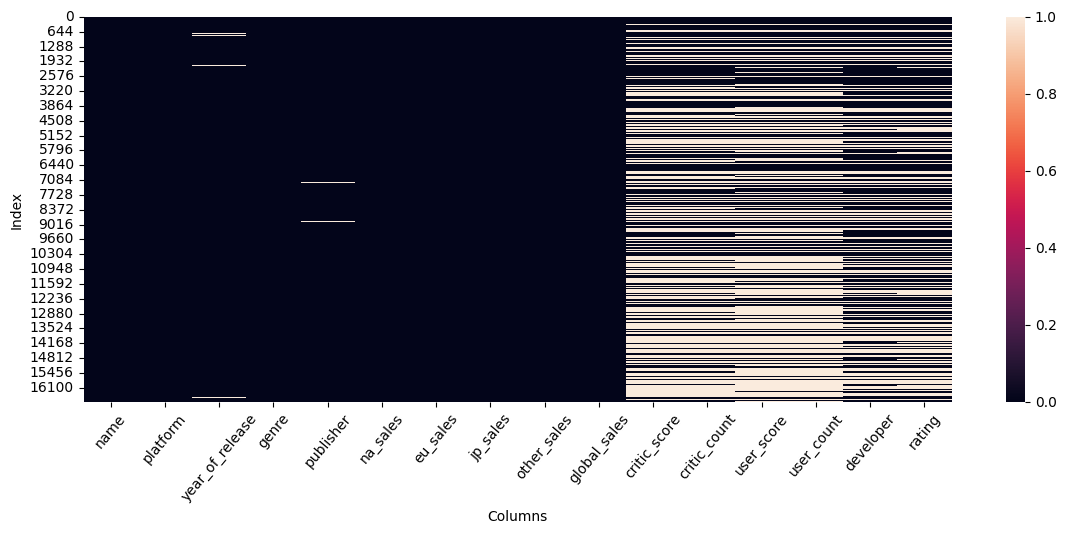

In [1251]:
sns.heatmap(null_video_games_df)

fig = plt.gcf()
fig.set_size_inches(14, 5)

plt.xlabel('Columns')
plt.ylabel('Index')
plt.xticks(rotation=50);

## 7. Drop outliers (columns which are not useful according to you)

In [1252]:
video_game_sales_df_copy = video_game_sales_df.copy()

In [1253]:
def isValInLst(val, lst):
    return all(x in lst for x in val)

In [1254]:
if isValInLst(['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], list(video_game_sales_df.columns)):
    video_game_sales_df_copy['total_sales'] = video_game_sales_df[['na_sales',	'eu_sales',	'jp_sales',	'other_sales']].sum(axis=1)
    display(video_game_sales_df_copy.loc[abs(video_game_sales_df_copy['total_sales'] - video_game_sales_df_copy['global_sales']) > 0.02])
else:
    print('data already cleaned, rerun previous cells to redisplay this dataframe output!')

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating,total_sales
106,Tekken 3,PS,1998.0,Fighting,Sony Computer Entertainment,3.27,2.22,1.40,0.29,7.16,96.0,15.0,9.1,367.0,Namco,T,7.18
1378,Need For Speed: Undercover,PS2,2008.0,Racing,Electronic Arts,0.38,0.08,0.03,0.93,1.40,NaN,NaN,6.5,38.0,Exient Entertainment,T,1.42
2686,Metroid Prime Hunters,DS,2006.0,Shooter,Nintendo,0.57,0.04,0.11,0.06,0.76,85.0,54.0,8.0,188.0,Nintendo,T,0.78
6395,R.U.S.E.,X360,2010.0,Strategy,Ubisoft,0.12,0.11,0.00,0.02,0.27,78.0,45.0,7.0,38.0,Eugen Systems,T,0.25


In [1255]:
if isValInLst(['developer'], list(video_game_sales_df.columns)):
    video_games_duplicated_name_df = video_game_sales_df.dropna().loc[video_game_sales_df[['name']].dropna().duplicated()]
    video_games_non_duplicated_name_developer_df = video_games_duplicated_name_df.drop_duplicates(subset=['name', 'developer'])
    display(video_games_non_duplicated_name_developer_df.loc[video_games_non_duplicated_name_developer_df['name'].duplicated(keep=False)].sort_values('name').head())
else:
    print('data already cleaned, rerun previous cells to recalculate this dataframe!')

,name,platform,year_of_release,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales,critic_score,critic_count,user_score,user_count,developer,rating
13303,2002 FIFA World Cup,GC,2002.0,Sports,Electronic Arts,0.04,0.01,0.0,0.00,0.05,78.0,9.0,7.7,6.0,EA Sports,E
7821,2002 FIFA World Cup,XB,2002.0,Sports,Electronic Arts,0.14,0.04,0.0,0.01,0.19,79.0,17.0,9.0,4.0,Software Creations,E
8072,Alone in the Dark,Wii,2008.0,Adventure,Atari,0.09,0.08,0.0,0.02,0.18,39.0,10.0,4.4,34.0,Hydravision,M
16536,Alone in the Dark,PC,2008.0,Adventure,Atari,0.00,0.01,0.0,0.00,0.01,55.0,19.0,5.7,148.0,Eden Studios,M
5627,Army of Two: The 40th Day,PSP,2010.0,Shooter,Electronic Arts,0.12,0.13,0.0,0.08,0.32,49.0,11.0,6.0,32.0,"Buzz Monkey, EA Montreal",M


<span style="font-size:30px;color:green"><b>DROPPING OUTLIERS</b></span>

In [1256]:
if isValInLst(['critic_score', 'critic_count', 'user_score', 'user_count', 'developer', 'rating'], list(video_game_sales_df.columns)):
    video_game_sales_df = video_game_sales_df.drop(columns=['critic_score', 'critic_count', 'user_score', 'user_count', 'developer', 'rating'])
else:
    print('data already cleaned, rerun previous cells to recalculate this dataframe!')

In [1257]:
video_game_sales_df.dtypes

name                object
platform            object
year_of_release    float64
genre               object
publisher           object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
global_sales       float64
dtype: object

In [1258]:
if isValInLst(['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], list(video_game_sales_df.columns)):
    video_game_sales_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']] = video_game_sales_df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales']].multiply(1000000)
else:
    print('data already cleaned, rerun previous cells to recalculate this dataframe!')

In [1259]:
sales_column_type_convert_dictionary = {'na_sales': 'int64', 'eu_sales': 'int64',
                                        'jp_sales': 'int64', 'other_sales': 'int64', 'global_sales': 'int64'}
sales_column_rename_dictionary = {'na_sales': 'games_sold_na', 'eu_sales': 'games_sold_eu',
                                        'jp_sales': 'games_sold_jp', 'other_sales': 'games_sold_other', 'global_sales': 'games_sold_global'}

In [1260]:
if isValInLst(['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'global_sales'], list(video_game_sales_df.columns)):
    video_game_sales_df = (
        video_game_sales_df
        .astype(sales_column_type_convert_dictionary)
        .convert_dtypes()
        .rename(columns=sales_column_rename_dictionary)
    )
    video_game_sales_df
else:
    print('data already cleaned, rerun previous cells to recalculate this dataframe!')

In [1261]:
video_game_sales_df.dtypes

name                 string[python]
platform             string[python]
year_of_release               Int64
genre                string[python]
publisher            string[python]
games_sold_na                 Int64
games_sold_eu                 Int64
games_sold_jp                 Int64
games_sold_other              Int64
games_sold_global             Int64
dtype: object

## 8. Drop the null values containing rows from the object which you created in point 7

In [1262]:
print(f'Number of rows before dropping null values: {len(video_game_sales_df)}\nNumber of rows after dropping null values:  {len(video_game_sales_df.dropna())}')

Number of rows before dropping null values: 16719
Number of rows after dropping null values:  16416


In [1263]:
video_game_sales_df_clean = video_game_sales_df.dropna()
video_game_sales_df_clean

,name,platform,year_of_release,genre,publisher,games_sold_na,games_sold_eu,games_sold_jp,games_sold_other,games_sold_global
0,Wii Sports,Wii,2006,Sports,Nintendo,41360000,28960000,3770000,8450000,82530000
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29080000,3580000,6810000,770000,40240000
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15680000,12760000,3790000,3290000,35520000
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15610000,10930000,3280000,2950000,32770000
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11270000,8890000,10220000,1000000,31370000
...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0,0,10000,0,10000
16715,LMA Manager 2007,X360,2006,Sports,Codemasters,0,10000,0,0,10000
16716,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0,0,10000,0,10000
16717,Spirits & Spells,GBA,2003,Platform,Wanadoo,10000,0,0,0,10000


## 9. Check the dataframe again if there is anything which you want to remove more.

The CSV file name is named video game sales as of "22 Dec 2016", and the data seems to back that up, because the sales for video games released in 2017 and 2020 are unrealistically lower than for the other years of release. Therefore, this erroneous data will be removed from the dataset!

In [1264]:
video_game_sales_sum_by_year = video_game_sales_df.groupby('year_of_release').sum(numeric_only=True)
video_game_sales_sum_by_year.sort_values('games_sold_global')

,games_sold_na,games_sold_eu,games_sold_jp,games_sold_other,games_sold_global
year_of_release,,,,,
2017,0,0,60000,0,60000
2020,270000,0,0,20000,290000
1980,10590000,670000,0,120000,11380000
1983,7760000,800000,8100000,140000,16790000
1987,8459999,1410000,11630000,200000,21740000
1982,26920000,1650000,0,310000,28860000
1991,12760000,3950000,14780000,740000,32230000
1981,33400000,1960000,0,320000,35770000
1986,12500000,2840000,19809999,1930000,37070000


In [1265]:
video_game_sales_df_clean.loc[(video_game_sales_df_clean['year_of_release'] == 2017) | (video_game_sales_df_clean['year_of_release'] == 2020)]

,name,platform,year_of_release,genre,publisher,games_sold_na,games_sold_eu,games_sold_jp,games_sold_other,games_sold_global
5936,Imagine: Makeup Artist,DS,2020,Simulation,Ubisoft,270000,0,0,20000,290000
14086,Phantasy Star Online 2 Episode 4: Deluxe Package,PS4,2017,Role-Playing,Sega,0,0,40000,0,40000
16222,Phantasy Star Online 2 Episode 4: Deluxe Package,PSV,2017,Role-Playing,Sega,0,0,10000,0,10000
16385,Brothers Conflict: Precious Baby,PSV,2017,Action,Idea Factory,0,0,10000,0,10000


In [1266]:
df_games_2017_2020 = ((video_game_sales_df_clean['year_of_release'] == 2017) | (video_game_sales_df_clean['year_of_release'] == 2020))

In [1267]:
print(f'Before dropping erroneous rows: {len(video_game_sales_df_clean)} rows\nAfter dropping erroneous rows:  {len(video_game_sales_df_clean.loc[~df_games_2017_2020])} rows')

Before dropping erroneous rows: 16416 rows
After dropping erroneous rows:  16412 rows


In [1268]:
video_game_sales_df_cleaned_years = video_game_sales_df_clean.loc[~df_games_2017_2020]

In [1269]:
video_game_sales_df_cleaned_years.tail(int(len(video_game_sales_df_cleaned_years) / 2))

,name,platform,year_of_release,genre,publisher,games_sold_na,games_sold_eu,games_sold_jp,games_sold_other,games_sold_global
8357,Garfield: Lasagna World Tour,PS2,2007,Action,Blast! Entertainment Ltd,80000,60000,0,20000,170000
8359,Bomberman B-Daman,SNES,1996,Shooter,Hudson Soft,0,0,170000,0,170000
8360,Monsters vs. Aliens,X360,2009,Action,Activision,120000,30000,0,10000,170000
8361,Beat Down: Fists of Vengeance,PS2,2005,Action,Capcom,40000,30000,90000,10000,170000
8362,World Destruction League: Thunder Tanks,PS,2000,Action,3DO,90000,60000,0,10000,170000
...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016,Action,Tecmo Koei,0,0,10000,0,10000
16715,LMA Manager 2007,X360,2006,Sports,Codemasters,0,10000,0,0,10000
16716,Haitaka no Psychedelica,PSV,2016,Adventure,Idea Factory,0,0,10000,0,10000
16717,Spirits & Spells,GBA,2003,Platform,Wanadoo,10000,0,0,0,10000


In [1270]:
video_game_sales_df_cleaned_years.loc[video_game_sales_df_cleaned_years.duplicated(['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,publisher,games_sold_na,games_sold_eu,games_sold_jp,games_sold_other,games_sold_global
604,Madden NFL 13,PS3,2012,Sports,Electronic Arts,2110000,220000,0,230000,2560000
1190,Need for Speed: Most Wanted,X360,2012,Racing,Electronic Arts,620000,780000,10000,150000,1560000
1591,Need for Speed: Most Wanted,X360,2005,Racing,Electronic Arts,1000000,130000,20000,100000,1250000
5973,Need for Speed: Most Wanted,PC,2005,Racing,Electronic Arts,20000,230000,0,40000,290000
11716,Need for Speed: Most Wanted,PC,2012,Racing,Electronic Arts,0,60000,0,20000,80000
16233,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0,10000,0,0,10000


In [1271]:
video_game_sales_df_cleaned_years.loc[video_game_sales_df_cleaned_years.duplicated(['name', 'platform', 'year_of_release'], keep=False)]

,name,platform,year_of_release,genre,publisher,games_sold_na,games_sold_eu,games_sold_jp,games_sold_other,games_sold_global
604,Madden NFL 13,PS3,2012,Sports,Electronic Arts,2110000,220000,0,230000,2560000
16233,Madden NFL 13,PS3,2012,Sports,Electronic Arts,0,10000,0,0,10000


In [1272]:
madden_duplicate = (video_game_sales_df_cleaned_years['name'] == 'Madden NFL 13') & (video_game_sales_df_cleaned_years['platform'] == 'PS3') & (video_game_sales_df_cleaned_years['year_of_release'] == 2012) & (video_game_sales_df_cleaned_years['games_sold_na'] == 0)
video_game_sales_df_cleaned_years_drop_duplicate = video_game_sales_df_cleaned_years.drop(madden_duplicate.loc[lambda x: x==True].index)

In [1273]:
video_game_sales_df_cleaned_years_drop_duplicate.loc[video_game_sales_df_cleaned_years_drop_duplicate.duplicated(['name', 'platform'], keep=False)]

,name,platform,year_of_release,genre,publisher,games_sold_na,games_sold_eu,games_sold_jp,games_sold_other,games_sold_global
1190,Need for Speed: Most Wanted,X360,2012,Racing,Electronic Arts,620000,780000,10000,150000,1560000
1591,Need for Speed: Most Wanted,X360,2005,Racing,Electronic Arts,1000000,130000,20000,100000,1250000
5973,Need for Speed: Most Wanted,PC,2005,Racing,Electronic Arts,20000,230000,0,40000,290000
11716,Need for Speed: Most Wanted,PC,2012,Racing,Electronic Arts,0,60000,0,20000,80000


## 10. Export dataframe to your desired location with no index column

In [1274]:
video_game_sales_df_cleaned_years.to_csv('video_game_sales_as_of_22_dec_2016_clean.csv', index=False)